<div style="text-align: right"> 24.01.2020</div>

***Name: Ole Böttger*** 

# Hausaufgabe Blatt 11

## Kinetische Gastheorie: Maxwell-Boltzmann-Verteilung

In dieser Aufgabe werden wir uns mit der kinetischen Gastheorie und der Maxwell-Boltzmann-Verteilung beschäftigen. Die genaue Herleitung der Maxwell-Boltzmann-Verteilung können Sie Kapitel 7.3.5 "Experimentalphysik I" von W. Demtröder entnehmen. 

Betrachtet man die Moleküle eines Gases als Teilchen, die lediglich durch elastische Stöße sowohl mit den Wänden ihrer Umgebung als auch untereinander wechselwirken, so spricht man von einem *idealen Gas*. 

## 1. Aufgabe
Misst man die Beträge der Geschwindigkeiten von einem idealen Gas, so stellt man fest, dass diese durch die Maxwell-Boltzmann-Verteilung beschrieben werden. Hier ist $v$ die Geschwindigkeit der Teilchen, $m$ die Masse der Teilchen, $T$ die Temperatur und $k_B$ die Boltzmann-Konstante 

$$\tag{1}
f\!\left(v\right)=4 \pi v^2 \cdot \left(\frac{m}{2 \pi k_B T}\right)^{3/2} \cdot \exp\left(\frac{-m v^2}{2 k_B T}\right).
$$

Diese Verteilung kann wie folgt begründet werden. Da keine Raumrichtung ausgezeichnet ist und die Teilchen ständig miteinander und ihrer Umgebung kollidieren, kann man annehmen, dass die Geschwindigkeiten für alle drei Komponenten $v_{\alpha}$, mit $\alpha = x, y,z$ zufällig verteilt sind.

Wir wollen nun diese Verteilung reproduzieren, indem wir Geschwindigkeitskomponenten $v_{\alpha}$, mit $\alpha = x, y,z$, für $N$ Teilchen zufällig aus einer Normalverteilung $\mathcal N$ mit Mittelwert gleich 0 und einer Standardabweichung von 1 ziehen
   $$\tag{2}
   v_{\alpha} = \sqrt{\frac{k_B T}{m}} \cdot \mathcal N\! \left(0,1\right).
   $$
   
Normalverteilte Zahlen mit Mittelwert gleich 0 und einer Standardabweichung von 1 können wie folgt erzeugt werden; hier werden Zufallszahlen für $N=5$ Teilchen in 3 Dimensionen erzeugt (daher (N,3)).
 ```python
import numpy as np
N = 5
gauss = np.random.normal(0,1,(N,3))
``` 

**a)** Versuchen Sie den obigen Code nachzuvollziehen. Erstellen Sie für $N=100$ Teilchen Zufallszahlen für jede Geschwindigkeitskomponente $\alpha=x, y, z$, indem Sie obigen Code und Gleichung (2) kombinieren. Nehmen Sie dabei für die Masse $m = 4.8 \cdot 10^{-3}$, für die Temperatur $T=70$ und für die Boltzmann Konstante $k_B=1.38$ an.


In [1]:
import numpy as np # Numpy import
N = 100 # Diesmal 100 Zahlen
gauss = np.random.normal(0,1,(N,3)) # Zufallszahlen erstellen

m = 4.8e-3 # Variablen definieren
T = 70
kb = 1.38

v = np.sqrt((kb * T)/m)*gauss # Definiere v nach Formel (2)


**b)** Berechnen Sie nun den Betrag der Geschwindigkeit $v$ aus den Geschwindigkeitskomponenten $\alpha=x,y,z$ für jede der $N=100$ erzeugten Zahlen. Benutzen Sie dafür die Normierungsfunktion `np.linalg.norm()` wie folgt: 
```python
norm = np.linalg.norm(geschwindigkeit, axis=1)
```
Das Stichwort `axis` gibt an, über welche "Dimension" des arrays der Betrag berechnet wird, also zum Beispiel über Zeilen oder Spalten.

In [2]:
norm = np.linalg.norm(v, axis=1) # Siehe schönen Text drüber

**c)** Erstellen Sie ein Histogramm aus den gerade berechneten Beträgen der Geschwindigkeit $v$. Benutzen Sie dafür den Histogramm Befehl `ax.hist()` wie folgt:
``` 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(v, density=True)```

Dabei stellt das Stichwort `density=True` sicher, dass das Histogramm normiert ist. Führen Sie sinnvolle Achsenbeschriftungen ein. Kommentieren Sie jede Zeile des Codes sinnvoll.

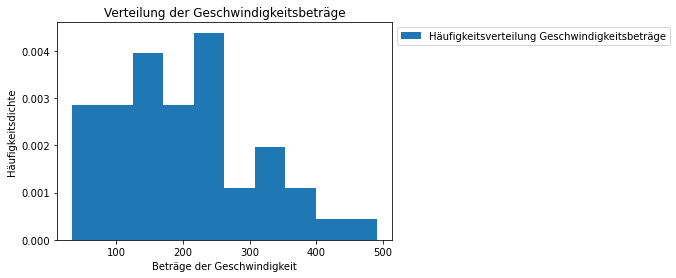

In [3]:
import matplotlib.pyplot as plt # Matplotlib import

fig, ax = plt.subplots()  
ax.set_title("Verteilung der Geschwindigkeitsbeträge")  # Titel
ax.set_xlabel("Beträge der Geschwindigkeit") # x-Achsenbeschriftung
ax.set_ylabel("Häufigkeitsdichte") # y-Achsenbeschriftung
ax.hist(norm, density=True, label="Häufigkeitsverteilung Geschwindigkeitsbeträge") #plot Histogram
ax.legend(bbox_to_anchor=(1,1), loc="best") # Legende (jetzt sogar neben dem Plot!)
plt.show()

**d)** Schreiben Sie eine Funktion, die als Argument ein array von Beträgen von Geschwindigkeiten und eine Temperatur annimmt und die Maxwell-Boltzmann Verteilung (Gleichung (1)) zurückgibt. Tipp: Sie können einen Array mit Werten mit gleichem Abstand mit ```np.arange``` erzeugen. Vergleichen Sie die theoretisch erwartete Verteilung mit Ihrer erzeugten in einem gemeinsamen Plot.  Kommentieren Sie jede Zeile des Codes sinnvoll.

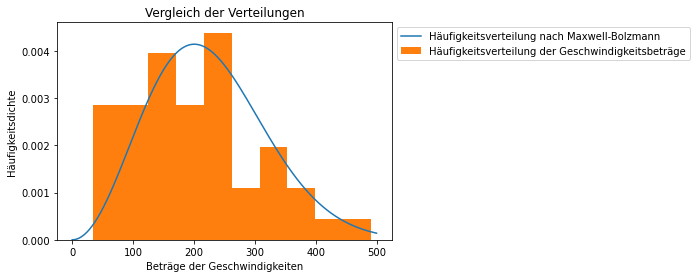

In [4]:
varr = np.arange(0, 501, 1) # array Geschwindigkeiten erstellen
def mbvert(varr,T): # Funktion definieren
    mbvert = 4*np.pi*varr**2*(m/(2*np.pi*kb*T))**(3/2)*np.exp((-m*varr**2)/(2*kb*T)) # Siehe Formel (1)
    return(mbvert) # Returnt den krassen Wert, ey

f = mbvert(varr,T) #f die Funktion mbvert zuweisen

#plotten
fig, ax = plt.subplots()

ax.set_title("Vergleich der Verteilungen")  # Titel
ax.set_xlabel("Beträge der Geschwindigkeiten") # x-Achsenbeschriftung
ax.set_ylabel("Häufigkeitsdichte") # y-Achsenbeschriftung

ax.plot(varr, f, label="Häufigkeitsverteilung nach Maxwell-Bolzmann")  # plot der Funktion
ax.hist(norm, density=True, label="Häufigkeitsverteilung der Geschwindigkeitsbeträge") #plot Histogram

ax.legend(bbox_to_anchor=(1,1), loc="best") # Legen...........dary
plt.show()

**e)** Wiederholen Sie Aufgaben **a)**-**d)** für $N=10000$ Teilchen.  Optional können Sie auch die Temperatur auf $T=290$ ändern. 
Was stellen Sie fest?

Ich stelle fest, dass ...

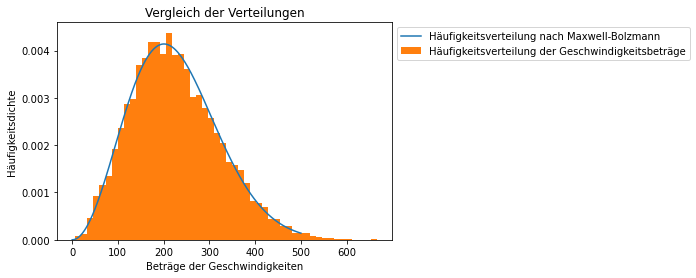

In [6]:
N = 10000
gauss = np.random.normal(0,1,(N,3))

v = np.sqrt((kb * T)/m)*gauss

norm = np.linalg.norm(v, axis=1)

varr = np.arange(0, 501, 1) # array Geschwindigkeiten erstellen
def mbvert(varr,T): # Funktion definieren
    mbvert = 4*np.pi*varr**2*(m/(2*np.pi*kb*T))**(3/2)*np.exp((-m*varr**2)/(2*kb*T)) # Siehe Formel (1)
    return(mbvert) # Returnt den krassen Wert, ey

f = mbvert(varr,T) #f die Funktion mbvert zuweisen

#plotten
fig, ax = plt.subplots()

ax.set_title("Vergleich der Verteilungen")  # Titel
ax.set_xlabel("Beträge der Geschwindigkeiten") # x-Achsenbeschriftung
ax.set_ylabel("Häufigkeitsdichte") # y-Achsenbeschriftung

ax.plot(varr, f, label="Häufigkeitsverteilung nach Maxwell-Bolzmann")  # plot der Funktion
ax.hist(norm, density=True, bins=50,label="Häufigkeitsverteilung der Geschwindigkeitsbeträge") #plot Histogram

ax.legend(bbox_to_anchor=(1,1), loc="best") # Legen...........dary
plt.show()

Für $N=100$ war noch ein sehr großer Unterschied zu erkennen, nun ist dieser deutlich kleiner geworden. Außerdem sind die Wahrscheinlichkeiten für Geschwindigkeiten, die sehr weit vom Mittelwert abweichen, deutlich geringer als beim Vorherigen Durchlauf, wobei es nun trotzdem Werte auftauchen, die sehr weit vom Mittelwert entfernt liegen.